# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas de Captura e Tratamento de Dados</span>

## <span style="color:blue">Avaliação Final</span>
**Luis Gustavo Nonato** e **Moacir Antonelli Ponti**<br>

**Cemeai - ICMC/USP São Carlos**

A avaliação vale 10 pontos. As questões de 1 a 4, caso respondidas da forma correta, já totalizam 10 pontos.


<font color='red'>**ATENÇÃO:** Quando terminar o exame, você deve fazer um "upload" do notebook no _moodle_</font>.

### Questão 1 (2.5 pontos)
Considere o arquivo <font style="font-family: monaco"> modcovid.pdf </font> (disponível para download no moodle). Escreva um código para extrair o texto (ASCII) do arquivo PDF e escreva o texto extraído em um arquivo chamado ``modcovid.txt``.


In [1]:
from pdf2image import convert_from_path 
from PIL import Image
import pytesseract as ocr
import glob

# Carrega o PDF e armazenas todas as páginas separadamente na variável
img_pages = convert_from_path('./data/modcovid.pdf') 

text = ''
for i, page in enumerate(img_pages): 

    text += ocr.image_to_string(page,
                                lang = 'por')
    
with open('./data/modcovid.txt', 'w') as file:
    file.write(text)

### Questão 2 (2.5 pontos)
Leia o arquivo ``modcovid.txt`` e realize as seguinte operações:
1. Extraia todas palavras contidas no arquivo e armazene em uma lista de palavras (utilize o método <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>.
2. Remova da lista de palavras todos os "palavras" que não sejam formadas exclusivamente de caracteres do alfabeto.
3. Quantas palavras com apenas 1 caractere sobraram na lista?

In [2]:
import nltk
import string 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/felipemoura/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
text_full = ''
# Leia o arquivo modcovid.txt e realize as seguinte operações:
with open('./data/modcovid.txt', 'r') as file:
    text_full = file.read()

# 1 - Extraia todas palavras contidas no arquivo e armazene em uma lista de palavras 
#     (utilize o método word_tokenize do pacote nltk.
words = nltk.word_tokenize(text_full)

# 2 - Remova da lista de palavras todos os "palavras" que não sejam 
#     formadas exclusivamente de caracteres do alfabeto.
words = [w.lower() for w in words if w.isalpha()]

# 3 - Quantas palavras com apenas 1 caractere sobraram na lista?
word_1_char = [ w for w in words if len(w) == 1]

In [4]:
print(f'Total de palavras com 1 caractere: {len(word_1_char)} palavras.')

Total de palavras com 1 caractere: 44 palavras.


### Questão 3 (2.5 pontos)

Antes de começar, carregue o arquivo `artists.csv` e armazene em um pandas DataFrame.


In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/artists_mba.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         53 non-null     object
 1   years        53 non-null     object
 2   genre        53 non-null     object
 3   nationality  53 non-null     object
 4   bio          53 non-null     object
 5   wikipedia    53 non-null     object
 6   paintings    53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


#### a) (0.5 pontos)

Crie um novo atributo no dataframe, chamado `birth`, pegando os 4 primeiros caracteres do atributo `years` e convertendo para inteiro.

Posteriormente, exiba o tipo do novo atributo e a estatística descritiva do novo atributo linhas usando a função `describe()`

In [6]:
# Crie um novo atributo no dataframe, chamado birth, 
# pegando os 4 primeiros caracteres do atributo years e convertendo para inteiro.
df['birth'] = df['years'].astype(str).str[0:4].map(int)

In [7]:
# Posteriormente, exiba o tipo do novo atributo
df['birth'].dtypes

dtype('int64')

In [8]:
# e a estatística descritiva do novo atributo linhas usando a função describe()
df['birth'].describe()

count      53.000000
mean     1729.358491
std       203.256573
min      1100.000000
25%      1571.000000
50%      1839.000000
75%      1872.000000
max      1928.000000
Name: birth, dtype: float64

#### b) (1 ponto)

Execute uma função que identifique outliers com base no intervalo interquartil.
Mostre as linhas referentes a outliers detectados por esse método no atributo `paintings` para valores para além de mais ou menos $2 \times IQR$.

In [9]:
Q1 = df['paintings'].quantile(0.25)
Q3 = df['paintings'].quantile(0.75)
IQR = Q3 - Q1

desvp = df['paintings'].std()
media = df['paintings'].mean()

print("IQR = %.2f" % IQR)
print("media = %.2f, desvio padrao = %.2f" % (media, desvp))

IQR = 120.00
media = 252.79, desvio padrao = 671.71


In [10]:
df_iqr = df[ ~df['paintings'].between(Q1 - (IQR * 2), Q3 + (IQR * 2), inclusive = True) ]

In [11]:
df_iqr.head()

,name,years,genre,nationality,bio,wikipedia,paintings,birth
8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877,1853
13,Pablo Picasso,1881 - 1973,Cubism,Spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439,1881
30,Edgar Degas,1834 - 1917,Impressionism,French,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702,1834
51,Candido Portinari,1903 – 1962,Neorealism,Brazilian,"Candido Portinari (December 29, 1903 – Februar...",https://en.wikipedia.org/wiki/Candido_Portinari,4920,1903


#### c) (1 ponto)

Crie um novo atributo numérico, codificando em inteiros o atributo `nationality`. Posteriormente, compute a correlação de Pearson entre esse novo atributo e o atributo `paintings`

In [12]:
df['nationality'].unique()

array(['Italian', 'Russian', 'Mexican', 'French', 'Belgian', 'Spanish',
       'Dutch', 'Austrian', 'Flemish', 'Spanish,Greek', 'German',
       'French,British', 'French,Jewish,Belarusian', 'British',
       'Norwegian', 'German,Swiss', 'American', 'Brazilian'], dtype=object)

In [13]:
df['nationality_cat'] = df['nationality'].astype('category').cat.codes

In [14]:
df[ ['nationality_cat', 'paintings'] ].corr()

,nationality_cat,paintings
nationality_cat,1.000000,-0.193837
paintings,-0.193837,1.000000


### Questão 4 (2.5 pontos)

Dada uma imagem `painting.jpg` de uma pintura da qual não sabemos o artista, gostaríamos de fazer uma busca numa base de dados e recuperar obras similares. Para isso utilizaremos uma composição de descritores:
1. Histograma de cores (R, G, B) considerando 4 bins por canal de cor (total 12 características)
2. Descritor LBP utilizando raio 2.5 e 16 pontos (total 18 características).

Concatene esses dois descritores e use-o como descritor de cor e textura da imagem. Faça uma busca no diretório `paintings`, retornando as 5 imagens mais similares de acordo com esse descritor e a distância Euclidiana. Exiba a imagem de consulta e também as 5 imagens retornadas, com seus nomes e valor da distância obtido.

In [15]:
import imageio
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import feature
from skimage import data
import glob

def euclidean_distance(A, B):
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt( np.sum((A-B)**2) )

def histograma_global(img, bins = 4):
    """ Histograma de cores (R, G, B) considerando 4 bins por canal de cor (total 12 características)"""
    # um único canal de cor
    if (len(img.shape) == 2):
        hist,_ = np.histogram(img, bins=bins)

    # mais do que um canal de cor RGB
    if (len(img.shape) == 3):
        hist_R,_ = np.histogram(img[:,:,0], bins=bins)
        hist_G,_ = np.histogram(img[:,:,1], bins=bins)
        hist_B,_ = np.histogram(img[:,:,2], bins=bins)
        
        hist = np.concatenate([hist_R, hist_G, hist_B])
        
    # normaliza o vetor resultante pela soma dos valores
    hist = hist.astype("float")
    hist /= (hist.sum() + 0.0001)        
    
    return hist

def lbp_features(img, points = 16, radius = 2.5, n_bins = 18):
    """ Descritor LBP utilizando raio 2.5 e 16 pontos (total 18 características). """
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
    
    # normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

In [16]:
# inclua o código para carregar as imagens, gerar os vetores de características e obter as distâncias
base_img_path = f'./data/paintings/painting.jpg'

# Find all files 
files = glob.glob('./data/paintings/*')

# Variables
imgs_compare = list()
img_base = None

# Reading images to variables
for file in files:
    # Reading compare images to a list
    if file != base_img_path:
        imgs_compare.append( imageio.imread(file) )
        
    # Reading base image
    else:
        img_base = imageio.imread(base_img_path)
        

dist = list()
# Concatenate and compute euclidean distance
for img_compare in imgs_compare:
    
    dist.append(euclidean_distance(np.concatenate([histograma_global(img_base),
                                                   lbp_features(img_base) ]),
                                   np.concatenate([ histograma_global(img_compare),
                                                   lbp_features(img_compare) ])))

df = pd.DataFrame(dist)
df_sorted = df.sort_values(by=[0])

Text(0.5, 1.0, 'Rank 5 : 0.2237')

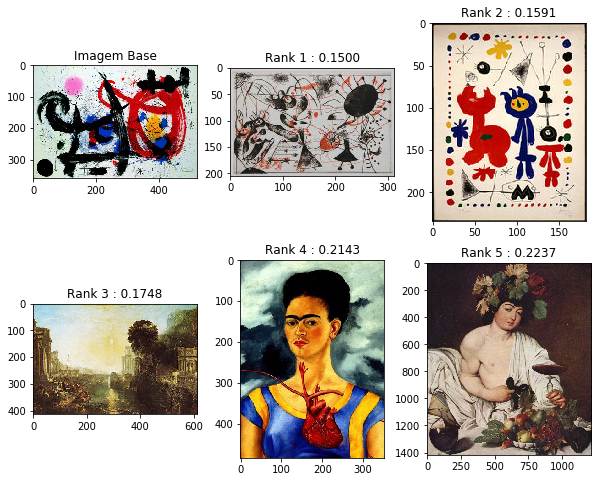

In [17]:
# Show best five images
plt.figure(figsize=(10,8))
plt.subplot(231); plt.imshow( img_base ); plt.title('Imagem Base')
plt.subplot(232); plt.imshow( imgs_compare[ df_sorted.index[0] ] ); plt.title('Rank 1 : %.4f' % df[0][ df_sorted.index[0] ])
plt.subplot(233); plt.imshow( imgs_compare[ df_sorted.index[1] ] ); plt.title('Rank 2 : %.4f' % df[0][ df_sorted.index[1] ])
plt.subplot(234); plt.imshow( imgs_compare[ df_sorted.index[2] ] ); plt.title('Rank 3 : %.4f' % df[0][ df_sorted.index[2] ])
plt.subplot(235); plt.imshow( imgs_compare[ df_sorted.index[3] ] ); plt.title('Rank 4 : %.4f' % df[0][ df_sorted.index[3] ])
plt.subplot(236); plt.imshow( imgs_compare[ df_sorted.index[4] ] ); plt.title('Rank 5 : %.4f' % df[0][ df_sorted.index[4] ])